***Task 3: Bank Customer Churn Prediction (EDA & Feature Analysis)***:

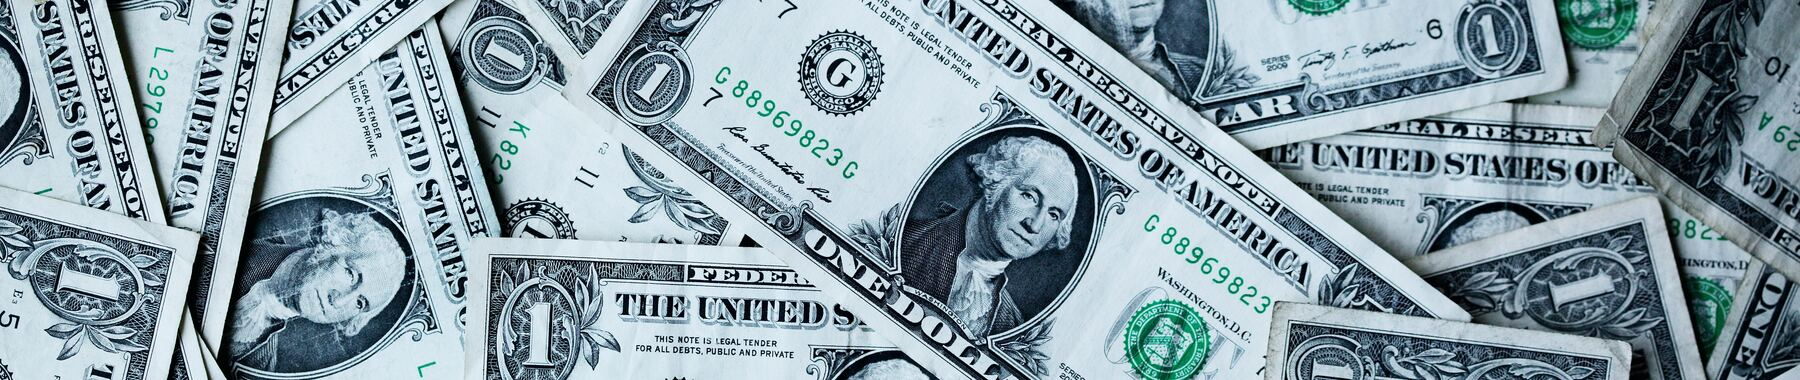

In [16]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load Dataset
df = pd.read_csv("/content/Churn_Modelling.csv")

# Show first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Drop unnecessary columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [18]:
#  Encode categorical features (Geography, Gender)
df = pd.get_dummies(df, drop_first=True)

In [19]:
#  Check churn rate

churn_rate = df["Exited"].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 20.37%


In [22]:

# Churn by Geography
geo_churn = df.groupby("Geography_Germany")["Exited"].mean()
print("Churn by Geography:\n", geo_churn)

Churn by Geography:
 Geography_Germany
False    0.163263
True     0.324432
Name: Exited, dtype: float64


In [23]:
# Churn by Gender
gender_churn = df.groupby("Gender_Male")["Exited"].mean()
print("Churn by Gender:\n", gender_churn)

Churn by Gender:
 Gender_Male
False    0.250715
True     0.164559
Name: Exited, dtype: float64


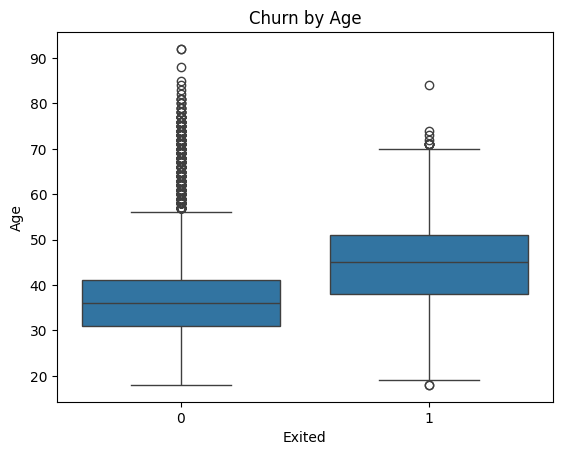

In [24]:
# Churn by Age viusalize
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Churn by Age")
plt.show()

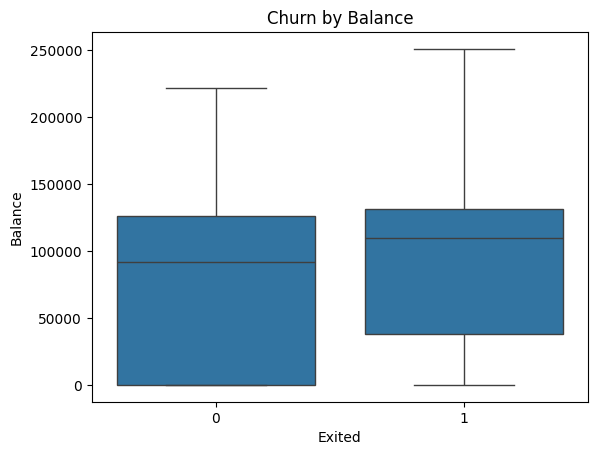

In [25]:
# Churn by Balance
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Churn by Balance")
plt.show()


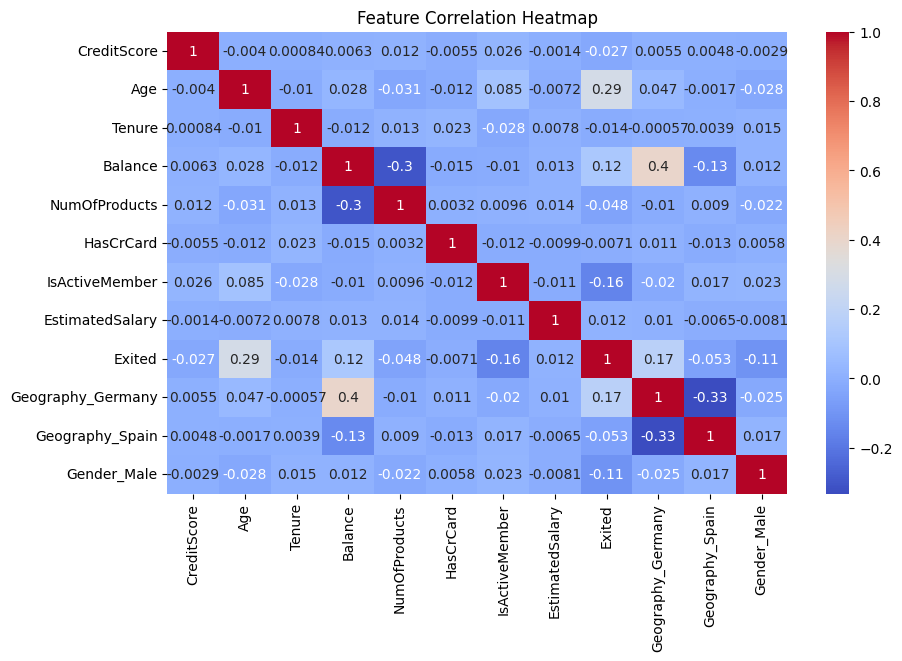

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
# Save cleaned dataset
df.to_csv("bank_churn_clean.csv", index=False)